## Este notebook tem como objetivo apresentar os resultados obtidos no PIBIC

In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm.notebook import tqdm

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'

path_data_Silas_Desktop = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic'
path_data_Silas_Laptop = r'C:\Users\silas\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic'
path_data_Silas_Optic = r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic'

listPath = [path_data_Silas_Desktop, path_data_Silas_Laptop, path_data_Silas_Optic]

In [3]:
def loadArray(file_path_prefix, num_files, file_path_suffix, flag_mean=False):
    
    data_list = []
    
    for i in range(num_files):
        file_path = f"{file_path_prefix}{i}{file_path_suffix}"
        with open(file_path, 'rb') as stream:
            data = np.load(stream)
            data_list.append(data)
    
    if flag_mean:
        data = np.mean(data_list, axis=0)
        return data
    
    else:
        return data_list

In [4]:
num_files = 5 # Número de arquivos a serem carregados
path = listPath[2]
# CSPR 
for indfile in range(0, num_files):
    CSPR_BER_PERMUTADO = loadArray(path+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)
    CSPR_SER_PERMUTADO = loadArray(path+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)
    CSPR_SNR_PERMUTADO = loadArray(path+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True) 
    CSPR_SIR_PERMUTADO = loadArray(path+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)

# CSPR dos resultados parciais como forma de comparação
for indfile in range(0, num_files):
    CSPR_BER_PARCIAL = loadArray(path+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SER_PARCIAL = loadArray(path+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SNR_PARCIAL = loadArray(path+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_outlier.npy', True) 
    CSPR_SIR_PARCIAL = loadArray(path+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_outlier.npy', True)  

## Resultados Variando o CSPR (Conjunto de treinamento permutado)

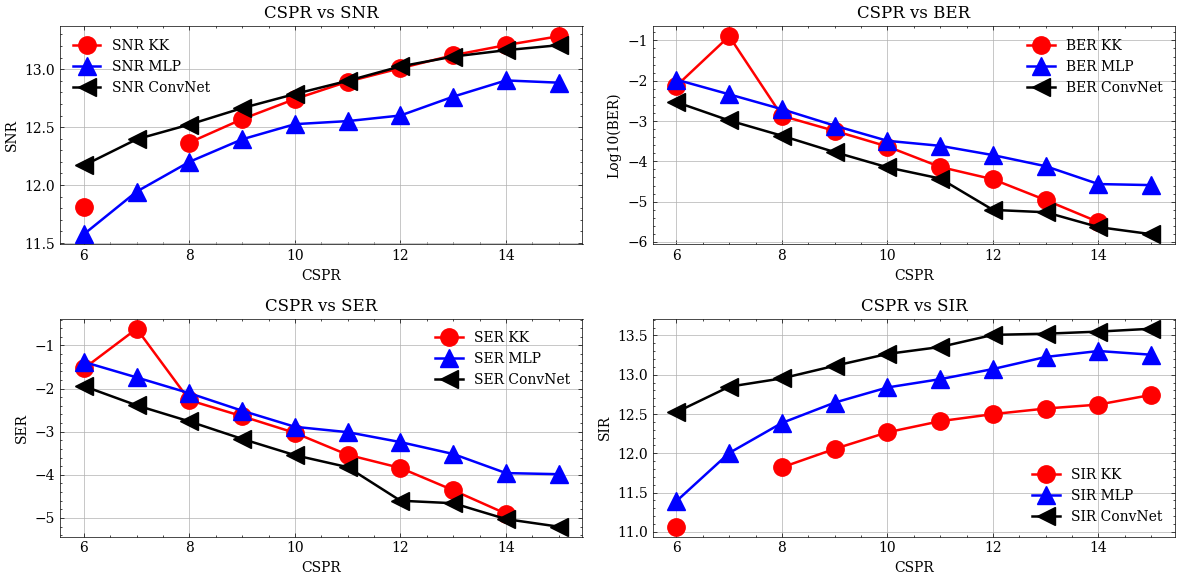

In [5]:
savePlots = False
loPower = np.arange(6,16,1)
markersize = 12.5
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

data = [
    (CSPR_SNR_PERMUTADO, 'SNR', 'CSPR vs SNR', 'SNR KK', 'SNR MLP', 'SNR ConvNet'),
    (CSPR_BER_PERMUTADO, 'Log10(BER)', 'CSPR vs BER', 'BER KK', 'BER MLP', 'BER ConvNet'),
    (CSPR_SER_PERMUTADO, 'SER', 'CSPR vs SER', 'SER KK', 'SER MLP', 'SER ConvNet'),
    (CSPR_SIR_PERMUTADO, 'SIR', 'CSPR vs SIR', 'SIR KK', 'SIR MLP', 'SIR ConvNet')
]

for i, ax in enumerate(axs.flat):
    data_to_plot, y_label, title, label1, label2, label3 = data[i]
    
    if y_label in ['SNR', 'SIR']:
        ax.plot(loPower, 10*np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, 10*np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, 10*np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    else:
        ax.plot(loPower, np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    ax.set_xlabel('CSPR')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Compara os resultados parciais com os resultados permutados

In [6]:
# Dados de correção para as curvas de KK
metric = ['BER', 'SER', 'SIR', 'SNR']
Data_KK = []

for index, indmetric in enumerate(metric):
    KK = np.load(r'C:/Users/optic/Documents/PIVIC-PIBIC-Comunicacoes-Opticas/resultados/Data/Pibic/CSPR_'+str(indmetric)+'_SpS_4_128_Sample_0_DataPermuted_KK.npy')
    Data_KK.append(KK[0,:])

Data_KK = np.array(Data_KK)

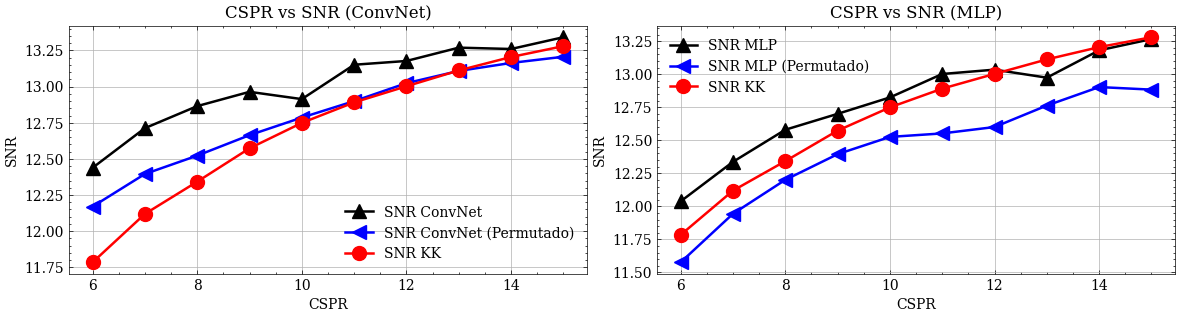

In [7]:
savePlots = False
loPower = np.arange(6,16,1)
markersize = 10

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[2,:]), marker='^', color = 'black', markersize=markersize, label='SNR ConvNet')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PERMUTADO[2,:]), marker='<', color = 'b', markersize=markersize, label='SNR ConvNet (Permutado)')
plt.plot(loPower, 10*np.log10(Data_KK[3,:]), marker='o', color = 'r', markersize=markersize, label='SNR KK')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR (ConvNet)')
plt.grid()
plt.legend()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[1,:]), marker='^', color = 'black', markersize=markersize, label='SNR MLP')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PERMUTADO[1,:]), marker='<', color = 'b', markersize=markersize, label='SNR MLP (Permutado)')
plt.plot(loPower, 10*np.log10(Data_KK[3,:]), marker='o', color = 'r', markersize=markersize, label='SNR KK')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR (MLP)')
plt.grid()

plt.legend()
plt.tight_layout()

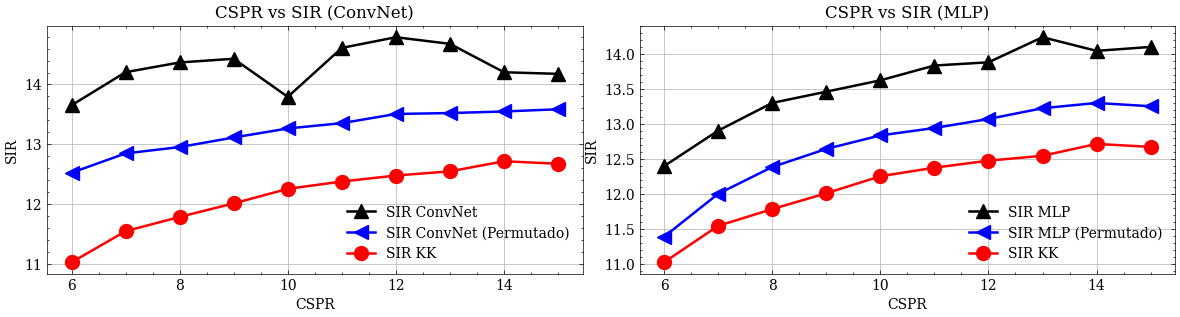

In [8]:
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[2,:]), marker='^', color = 'black', markersize=markersize, label='SIR ConvNet')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PERMUTADO[2,:]), marker='<', color = 'b', markersize=markersize, label='SIR ConvNet (Permutado)')
plt.plot(loPower, 10*np.log10(Data_KK[2,:]), marker='o', color = 'r', markersize=markersize, label='SIR KK')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[1,:]), color = 'black', marker='^', markersize=markersize, label='SIR MLP')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PERMUTADO[1,:]), color = 'b', marker='<', markersize=markersize, label='SIR MLP (Permutado)')
plt.plot(loPower, 10*np.log10(Data_KK[2,:]), marker='o', color = 'r', markersize=markersize, label='SIR KK')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

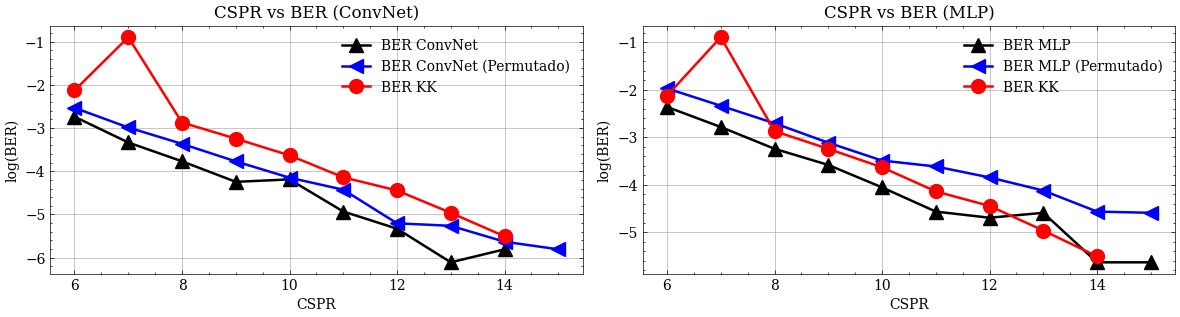

In [9]:
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[2,:]), marker='^', color = 'black', markersize=markersize, label='BER ConvNet')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[2,:]), marker='<', color = 'b', markersize=markersize, label='BER ConvNet (Permutado)')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[0,:]), marker='o', color = 'r', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('log(BER)')
plt.title('CSPR vs BER (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[1,:]), marker='^', color = 'black', markersize=markersize, label='BER MLP')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[1,:]), marker='<', color = 'b', markersize=markersize, label='BER MLP (Permutado)')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[0,:]), marker='o', color = 'r', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('log(BER)')
plt.title('CSPR vs BER (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

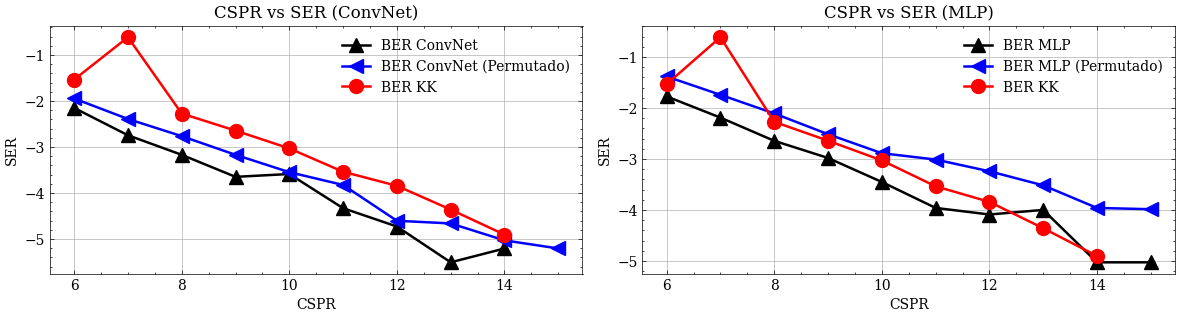

In [10]:
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, np.log10(CSPR_SER_PARCIAL[2,:]), marker='^', color = 'black',markersize=markersize, label='BER ConvNet')
plt.plot(loPower, np.log10(CSPR_SER_PERMUTADO[2,:]), marker='<', color = 'b', markersize=markersize, label='BER ConvNet (Permutado)')
plt.plot(loPower, np.log10(CSPR_SER_PERMUTADO[0,:]), marker='o', color = 'r', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('SER')
plt.title('CSPR vs SER (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, np.log10(CSPR_SER_PARCIAL[1,:]), marker='^', color = 'black', markersize=markersize, label='BER MLP')
plt.plot(loPower, np.log10(CSPR_SER_PERMUTADO[1,:]), marker='<', color = 'b', markersize=markersize, label='BER MLP (Permutado)')
plt.plot(loPower, np.log10(CSPR_SER_PERMUTADO[0,:]), marker='o', color = 'r', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('SER')
plt.title('CSPR vs SER (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

In [41]:
# Dados de correção KK
Data_KK = []
for index in range(0, 4):
    KK_AWGN = np.load(r'C:/Users/optic/Documents/PIVIC-PIBIC-Comunicacoes-Opticas/resultados/Data/Pibic/CSPR_BER_SpS_4_128_Sample_'+str(index)+'_KK_awgn_0.05.npy')
    Data_KK.append(KK_AWGN[:,0][0])

Data_KK = np.array(Data_KK)

In [42]:
CSPR_BER_Rolloff_005     = np.load(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_debug.npy')
CSPR_BER_Rolloff_05      = np.load(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_awgn_0.5.npy')
# dados de correção para MLP
CSPR_BER_Rolloff_05_MLP  = np.load(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_1_awgn_0.5.npy')
# Corrige a curva MLP
CSPR_MLP = np.mean([CSPR_BER_Rolloff_05[:,0][1], CSPR_BER_Rolloff_05_MLP[:,0][0]], axis=0)
# Corrige a curva KK
CSPR_KK_005 = np.mean([CSPR_BER_Rolloff_005[:,0][0], Data_KK[0], Data_KK[1], Data_KK[2], Data_KK[3]], axis=0) 

#CSPR_SNR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SIR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_debug.npy') 

#CSPR_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_TRAIN.npy') 

### Resultados para canal AWGN Rolloff 0.05
modelos treinados com o rolloff de 0.05

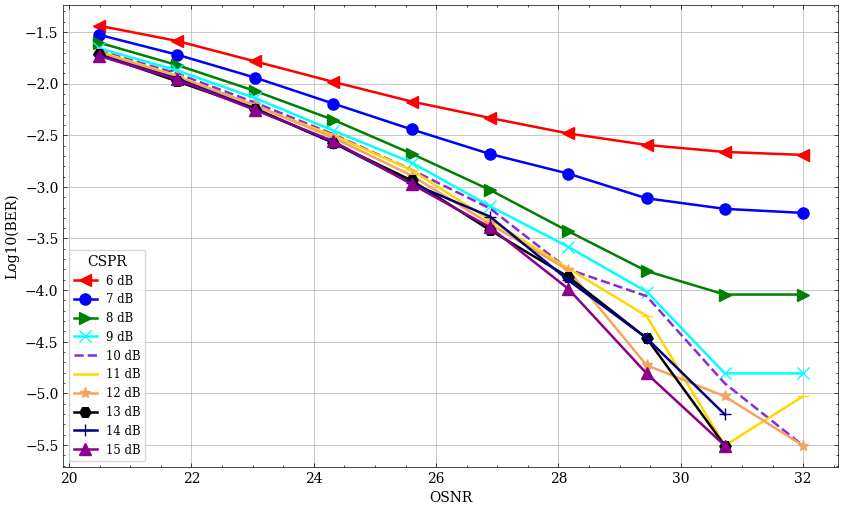

In [43]:
loPower = np.arange(6,16,1)
SNR_values = np.arange(16,26,1)
OSNR = ((1*32e9)/(2*12.5e9))*SNR_values

plt.figure(figsize=(10,6))

labels = ['-<', '-o', '->', '-x', '--', '-_', '-*', '-H', '-+', '-^']
colors = ['red', 'blue', 'green', 'aqua', 'blueviolet', 'gold', 'sandybrown', 'black', 'navy', 'darkmagenta']

for index, indCSPR in enumerate(loPower):
    plt.plot(OSNR, np.log10(CSPR_BER_Rolloff_005[:,index][2]), labels[index], markersize=8, color = colors[index], label=str(indCSPR)+' dB')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('OSNR');
plt.ylabel('Log10(BER)');
plt.grid();

### Resultados para canal AWGN Rolloff 0.5
modelos treinados com o rolloff de 0.5

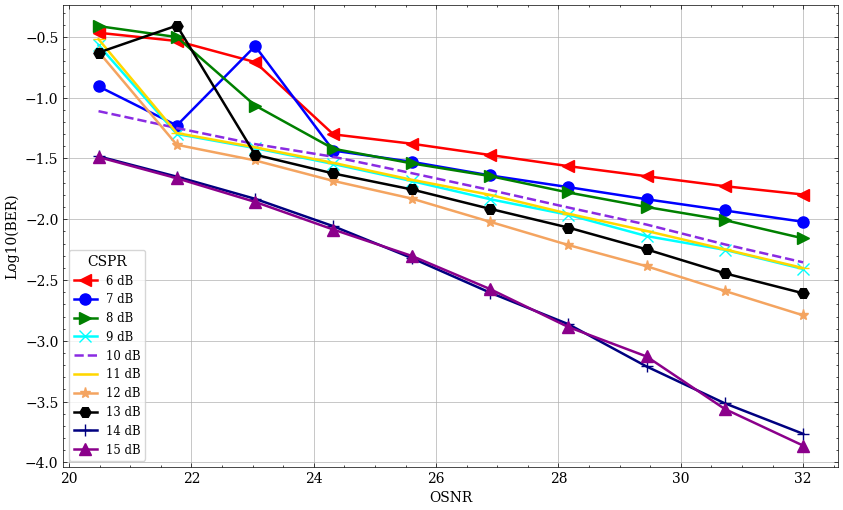

In [44]:
loPower = np.arange(6,16,1)
SNR_values = np.arange(16,26,1)
OSNR = ((1*32e9)/(2*12.5e9))*SNR_values

plt.figure(figsize=(10,6))

labels = ['-<', '-o', '->', '-x', '--', '-_', '-*', '-H', '-+', '-^']
colors = ['red', 'blue', 'green', 'aqua', 'blueviolet', 'gold', 'sandybrown', 'black', 'navy', 'darkmagenta']

for index, indCSPR in enumerate(loPower):
    plt.plot(OSNR, np.log10(CSPR_BER_Rolloff_05[:,index][2]), labels[index], markersize=8, color = colors[index], label=str(indCSPR)+' dB')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('OSNR');
plt.ylabel('Log10(BER)');
plt.grid();

## Comparação de desempenho CSPR 6dB, Rolloff 0.5 vs Rolloff 0.05 

In [54]:
Data_KK[0]

array([0.0349375 , 0.02425313, 0.01692187, 0.01119688, 0.00815   ,
       0.00606875, 0.00479375, 0.00351563, 0.00329375, 0.00306563])

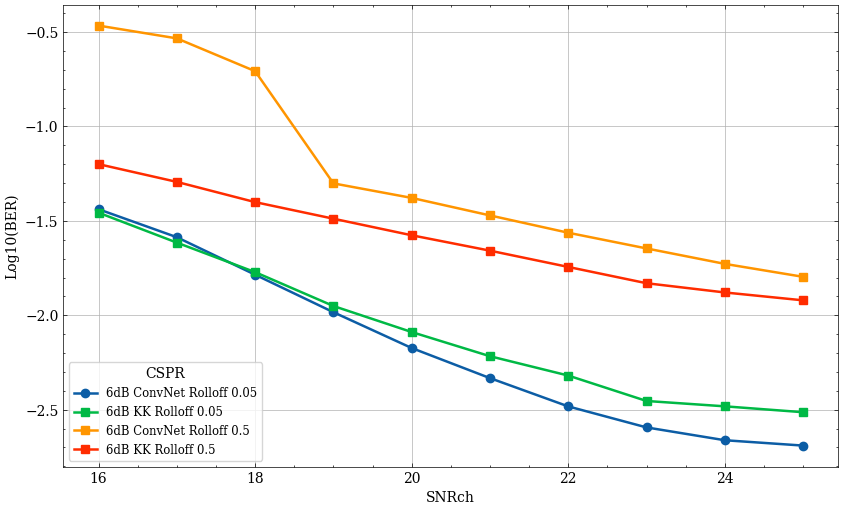

In [59]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_005[:,0][2]), '-o', label='6dB ConvNet Rolloff 0.05')
plt.plot(SNR_values, np.log10(Data_KK[0]), '-s', label='6dB KK Rolloff 0.05')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05[:,0][2]), '-s', label='6dB ConvNet Rolloff 0.5')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05[:,0][0]), '-s', label='6dB KK Rolloff 0.5')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();

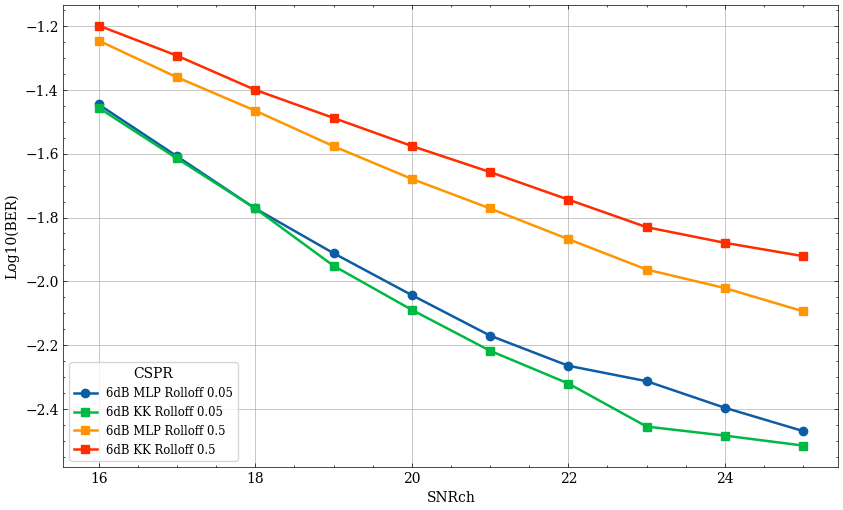

In [60]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_005[:,0][1]), '-o', label='6dB MLP Rolloff 0.05')
plt.plot(SNR_values, np.log10(Data_KK[0]), '-s', label='6dB KK Rolloff 0.05')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05_MLP[:,0][0]), '-s', label='6dB MLP Rolloff 0.5')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05[:,0][0]), '-s', label='6dB KK Rolloff 0.5')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();

## ConvNet vs MLP

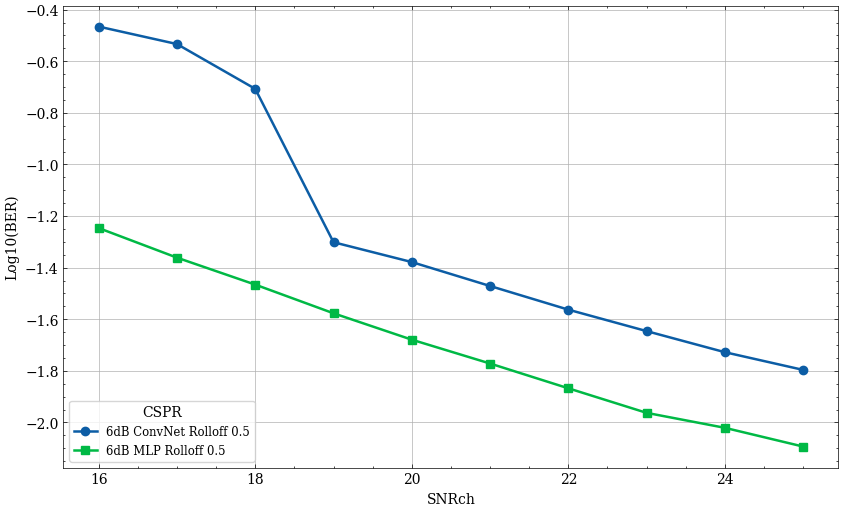

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05[:,0][2]), '-o', label='6dB ConvNet Rolloff 0.5')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_05_MLP[:,0][0]), '-s', label='6dB MLP Rolloff 0.5')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();

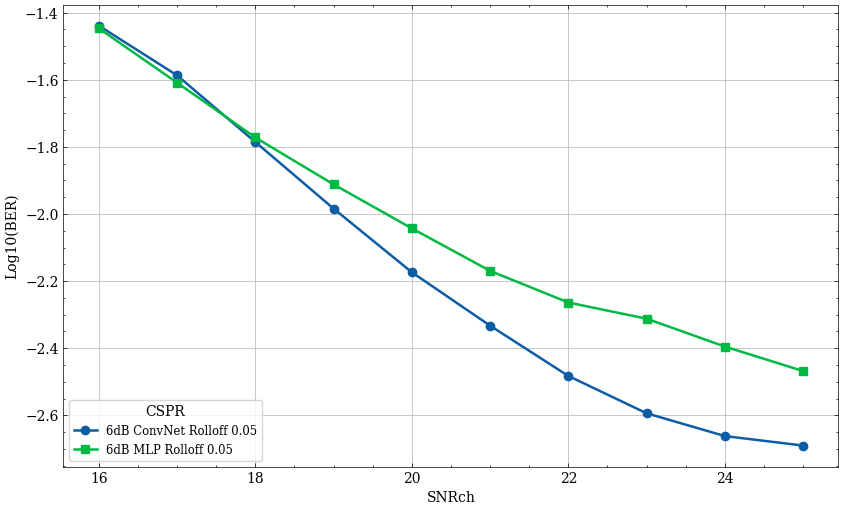

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_005[:,0][2]), '-o', label='6dB ConvNet Rolloff 0.05')
plt.plot(SNR_values, np.log10(CSPR_BER_Rolloff_005[:,0][1]), '-s', label='6dB MLP Rolloff 0.05')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();

## Comparação com o modelo convolucional testado com um conjunto de treinamento permutado

In [ ]:
# plt.figure(figsize=(10,6))

# plt.plot(SNR_values, np.log10(CSPR_BER[:,4][2]), '-o', label='10 dB ConvNet')
# #plt.plot(SNR_values, np.log10(CSPR_BER_2[:,4][0]), '-o', label='10 dB ConvNet Train')
# #plt.plot(OSNR, np.log10(CSPR_BER[:,1][1]), '-x', label='7 dB MLP')
# plt.plot(SNR_values, np.log10(CSPR_BER[:,4][0]), '-s', label='10 dB KK')

# plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
# #plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
# #plt.title('ConvNet Receiver');
# plt.xlabel('SNRch');
# plt.ylabel('Log10(BER)');
# plt.grid();